### Customer Churn Analysis
Dataset Info: Sample Data containing customer data and showing customers left last month

In [34]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [35]:
df= pd.read_csv(r'C:\Users\kiyo3001\Desktop\Personal\GITHUB\TELECOM CUSTOMER CHURN\Telco_Cusomer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.shape

(7043, 21)

In [37]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [38]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [39]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen is int type but it should be categorical type

75% of customers have tenure less than 55 months

average monthly charges are USD 64.76 whereas 25% of customers pay more than USD 90 per month



In [40]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [41]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

[Text(3, 0, '5174'), Text(3, 0, '1869')]

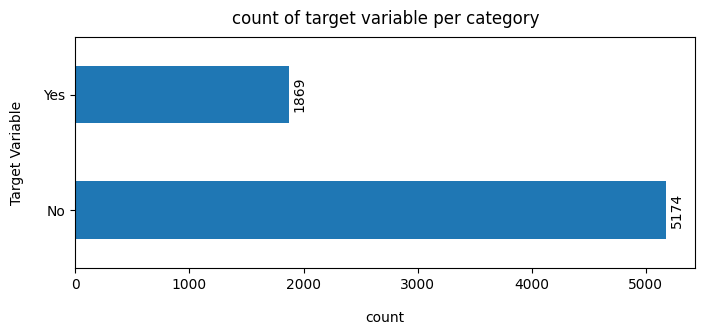

In [42]:

ax = df['Churn'].value_counts().plot(kind='barh', figsize=(8,3))

plt.xlabel('count', labelpad=14)
plt.ylabel('Target Variable', labelpad=14)
plt.title('count of target variable per category', y=1.02)

# Add labels to bars
ax.bar_label(ax.containers[0], label_type='edge', padding=3, rotation=90)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [44]:
df1= df.copy()
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
# converting total charges to numeric
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [46]:
df1.loc[df1['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [47]:
df1.dropna(how='any', inplace=True)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [49]:
# calculate min and max of tenure
print(df1['tenure'].min())
print(df1['tenure'].max())

1
72


In [50]:
# create 6 equal bins
edges = [1, 13, 25, 37, 49, 61, 73]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df1['tenure_bin']= pd.cut(df1['tenure'], bins=edges, labels=labels, right=True, include_lowest=True)

In [51]:
bin_counts = df1['tenure_bin'].value_counts().sort_index()
print(bin_counts)

tenure_bin
1-12     2284
13-24     994
25-36     818
37-48     763
49-60     842
61-72    1331
Name: count, dtype: int64


[Text(0, 3, '2284'),
 Text(0, 3, '994'),
 Text(0, 3, '818'),
 Text(0, 3, '763'),
 Text(0, 3, '842'),
 Text(0, 3, '1331')]

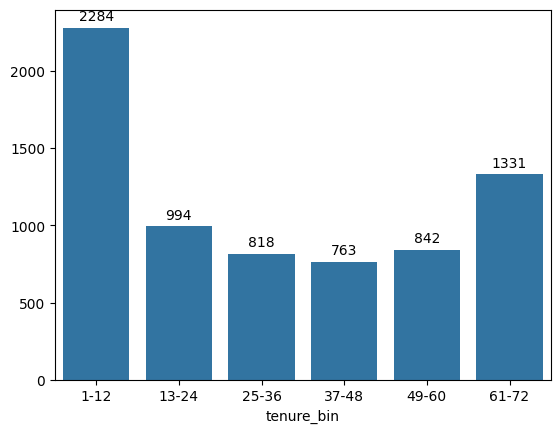

<Figure size 2500x500 with 0 Axes>

In [52]:
ax = sns.barplot(x=bin_counts.index, y=bin_counts.values)
plt.figure(figsize=(25,5))
ax.bar_label(ax.containers[0], label_type='edge', padding=3, rotation=0)



In [53]:
df1.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


### Data Exploration

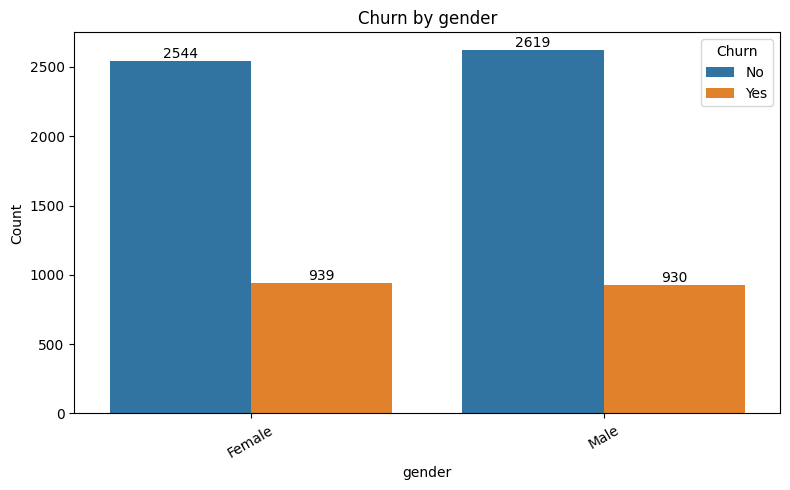

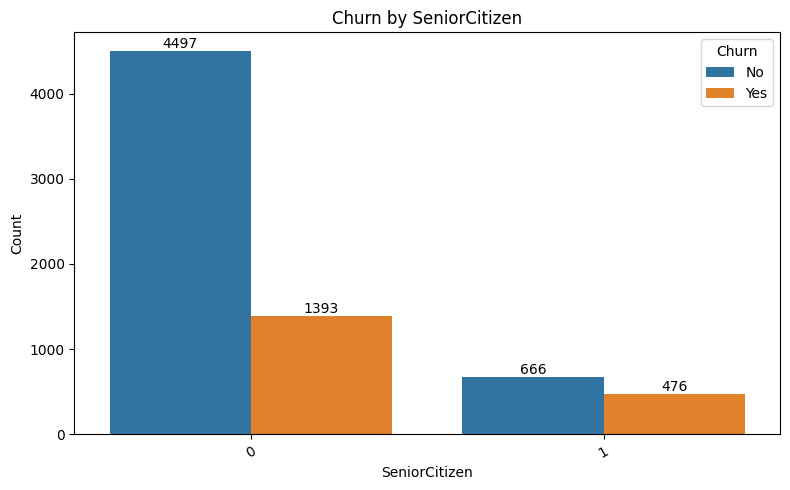

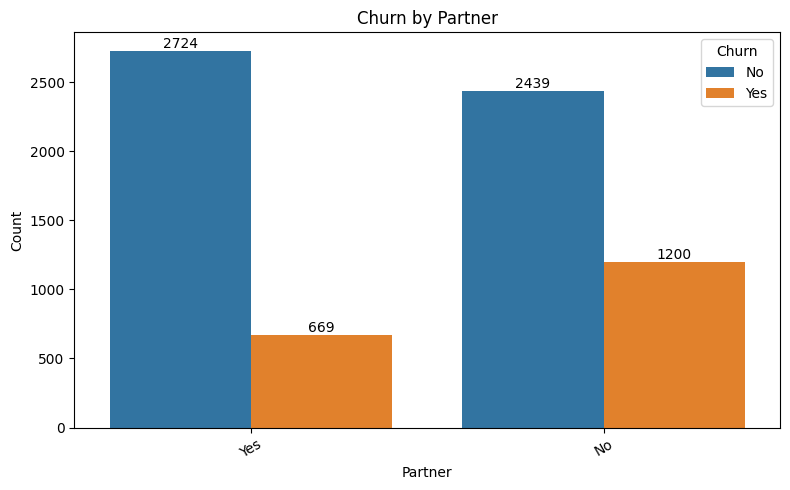

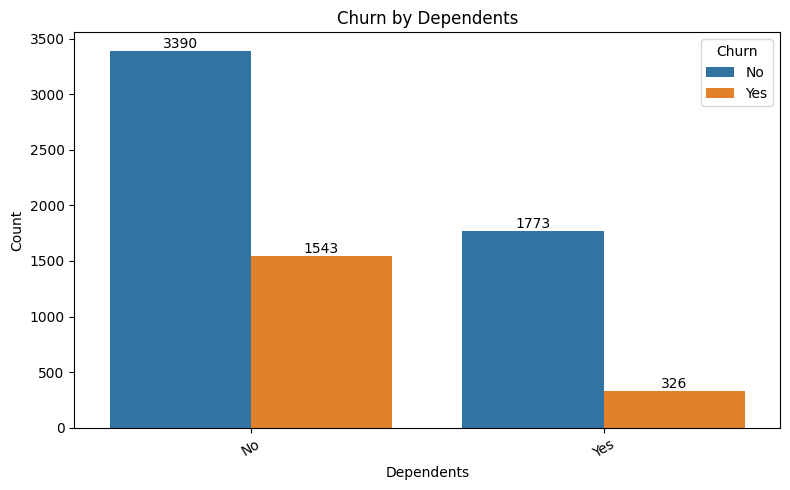

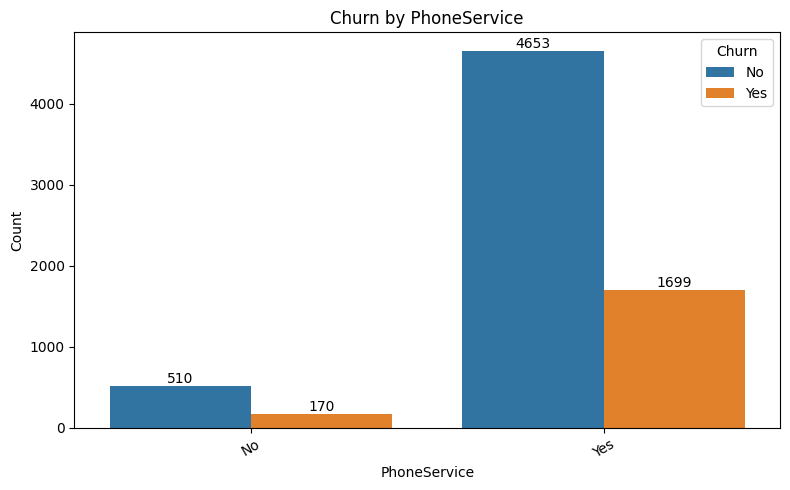

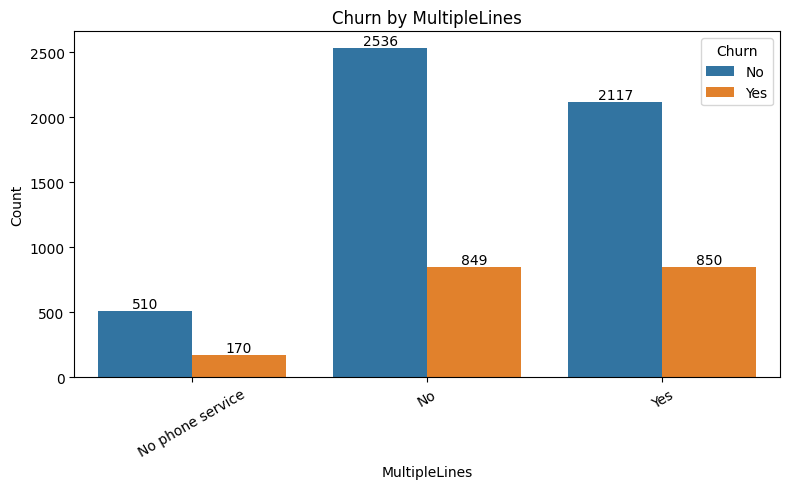

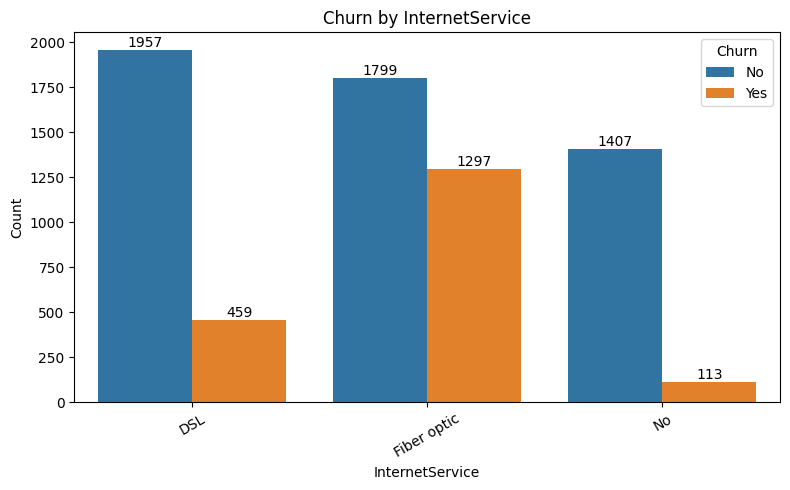

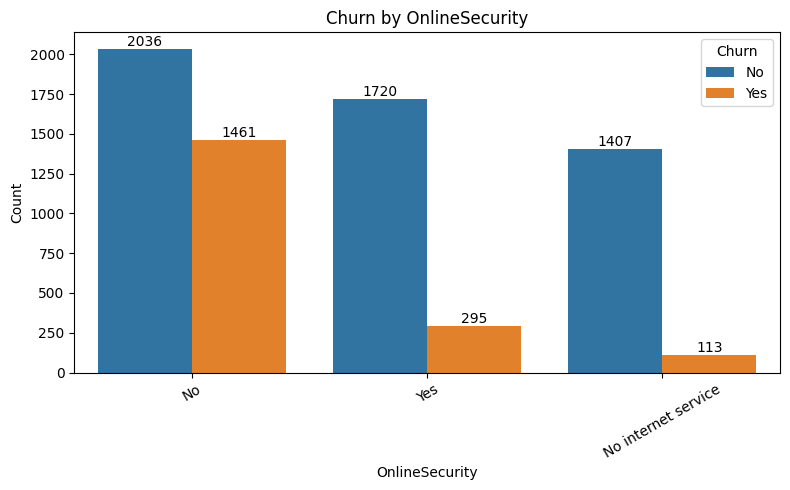

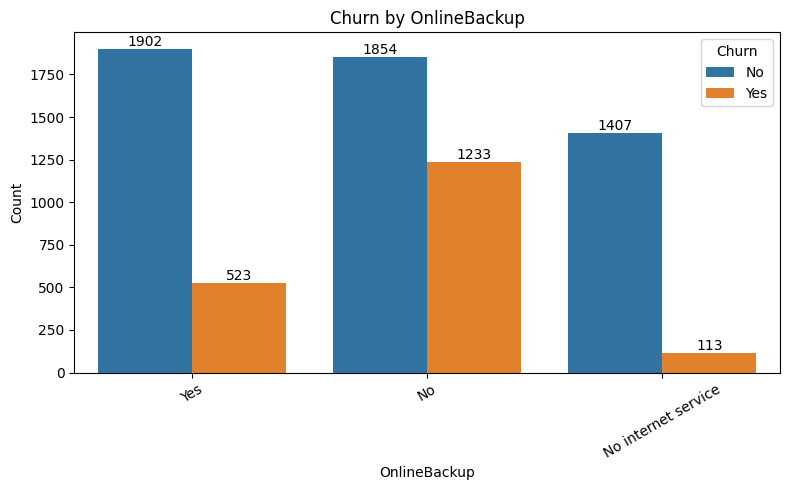

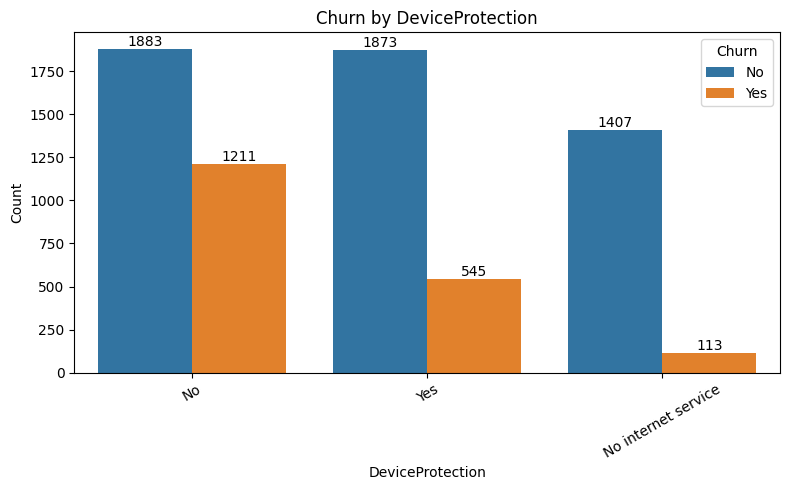

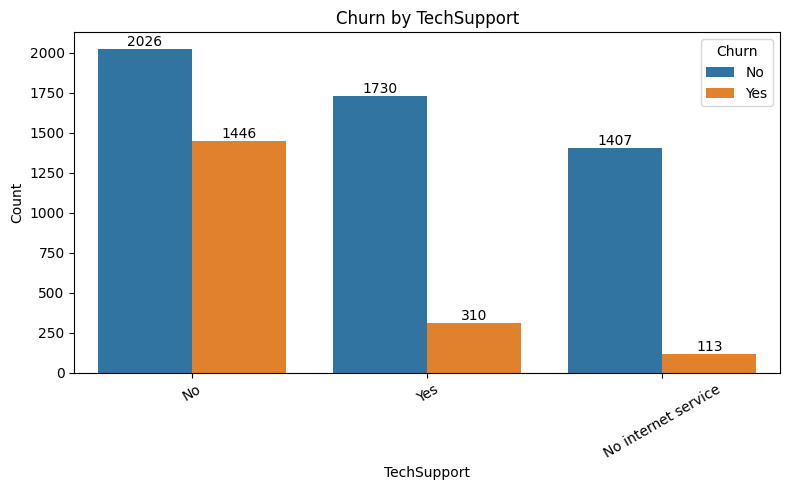

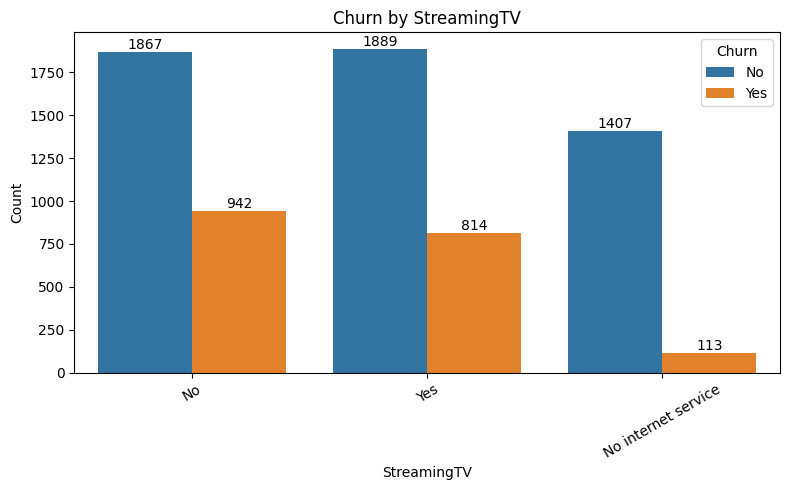

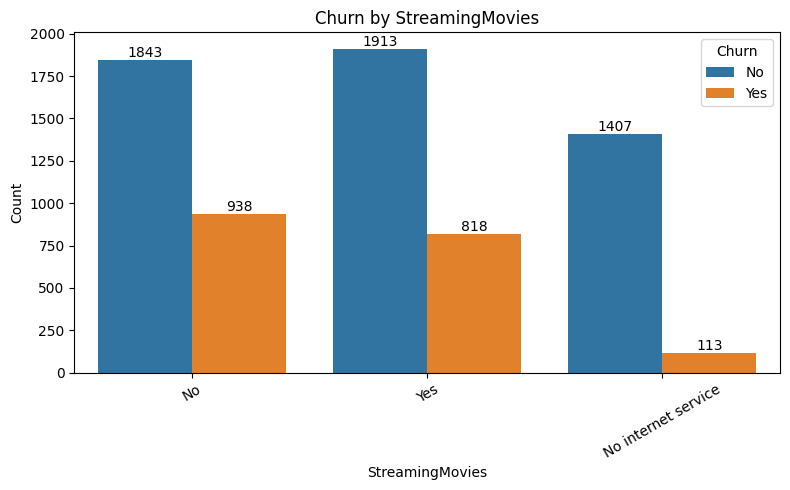

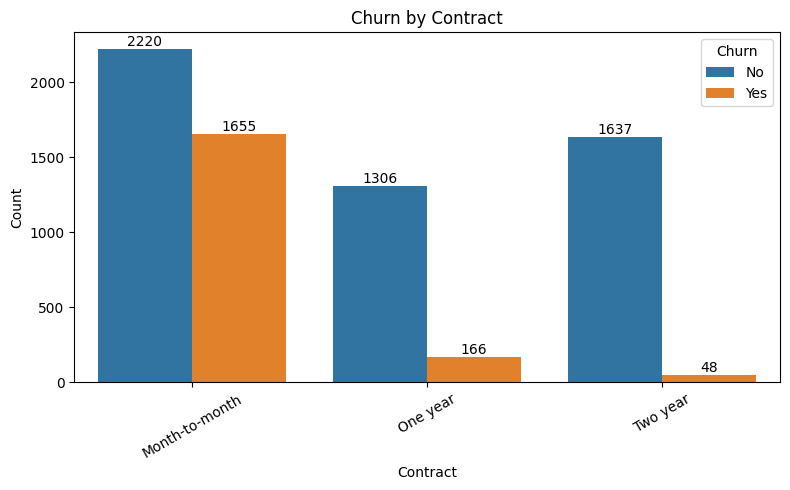

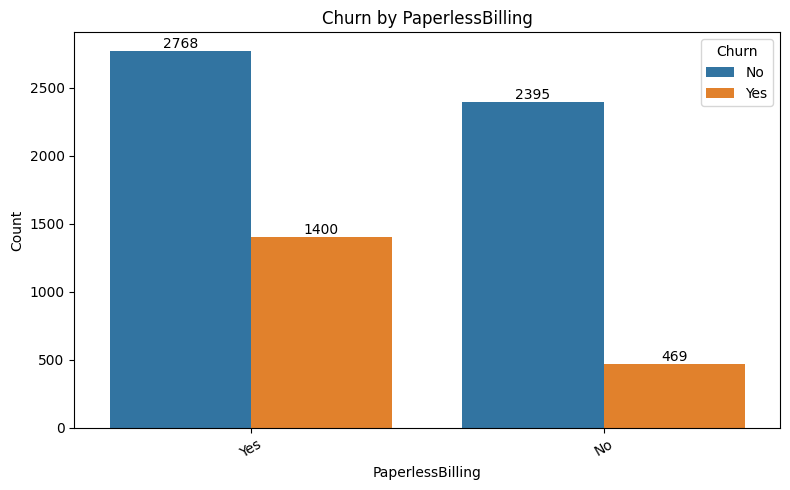

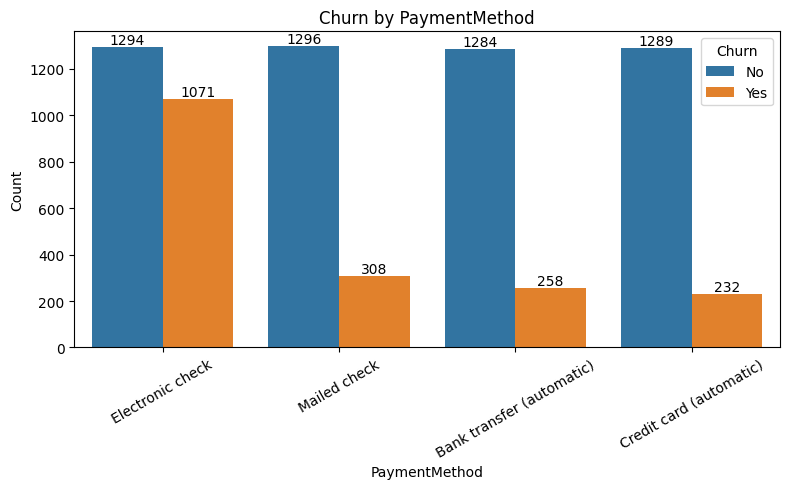

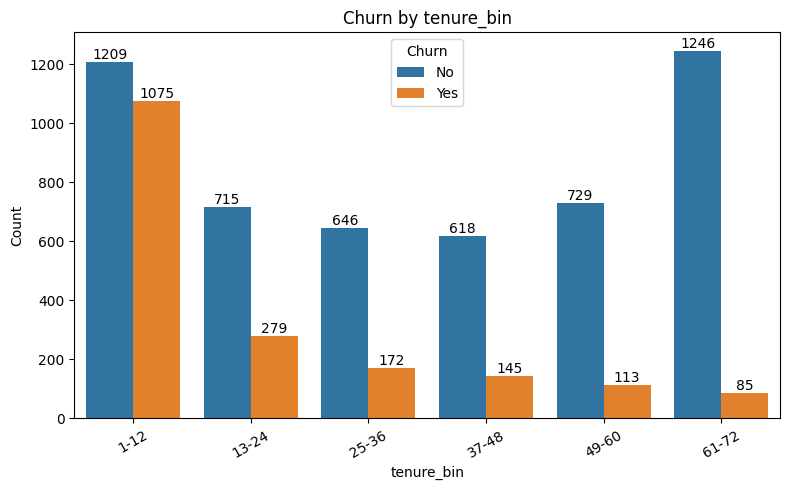

In [54]:

# Exclude target and numeric columns
exclude = ['Churn', 'TotalCharges', 'MonthlyCharges']
predictors = [col for col in df1.columns if col not in exclude]

for i, predictor in enumerate(predictors):
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df1, x=predictor, hue='Churn')

    # Add title and axis labels
    plt.title(f'Churn by {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.xticks(rotation=30)

    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')

    plt.tight_layout()
    plt.show()


## Key Observations: 
1) Senior Citizens Exhibit Higher Churn Risk

    - Senior citizens show a significantly higher churn rate, with 42% opting out of the service, indicating they are more likely to discontinue compared to other customer segments.


2) Fiber Optic Customers Are More Prone to Churn

    - Customers using Fiber Optic connections have a churn rate of 42%, suggesting that this service type is strongly associated with higher attrition.


3) Contract Type Strongly Influences Churn

    - Month-to-month contracts have the highest churn rate at 43%,
    - One-year contracts reduce churn to 11%,
    - Two-year contracts have the lowest churn at 3%.
    This highlights that long-term contracts significantly improve customer retention.



4) Payment Method Correlates with Churn

    - Customers paying via electronic check churn at 45%, whereas other payment methods (mailed check, bank transfer, credit card) show much lower churn rates, between 15%–19%. This suggests electronic check users are a high-risk segment.


5) Tenure Is a Strong Predictor of Churn

    - Customers with 1–12 months tenure churn at 47%,
    - Churn decreases progressively with tenure: 28% (13–24 months), 21% (25–36 months), and only 6% for 61–72 months.
    This indicates that early-stage customers are most vulnerable, and retention strategies should focus on the first year.

In [55]:
# convert churn in binary numeric variable i.e. yes=1, no=0
df1['Churn']= np.where(df1.Churn=='Yes',1,0)

In [56]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

In [57]:
# Convert categorical variables to dummy variables

df1.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [58]:
new_df = pd.get_dummies(df1, dtype='int64')
new_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_1-12,tenure_bin_13-24,tenure_bin_25-36,tenure_bin_37-48,tenure_bin_49-60,tenure_bin_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


C:\Users\kiyo3001\AppData\Local\Temp\1\ipykernel_20920\2032099818.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth= sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 0)], color="Blue", shade =True)
C:\Users\kiyo3001\AppData\Local\Temp\1\ipykernel_20920\2032099818.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth= sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 1)], color="Red", shade =True)


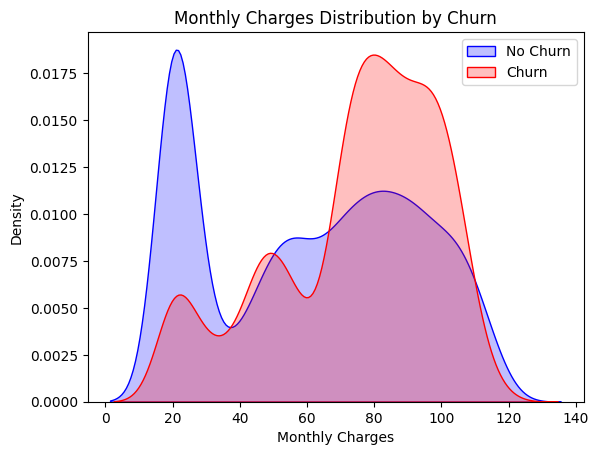

In [59]:
mth= sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 0)], color="Blue", shade =True)
mth= sns.kdeplot(new_df.MonthlyCharges[(new_df["Churn"] == 1)], color="Red", shade =True)
mth.set_xlabel("Monthly Charges")
mth.set_ylabel("Density")
mth.set_title("Monthly Charges Distribution by Churn")
mth.legend(["No Churn","Churn"], loc='upper right')

- Churn is high when Monthly charges are higher

C:\Users\kiyo3001\AppData\Local\Temp\1\ipykernel_20920\389961338.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df.TotalCharges[(new_df['Churn']==0)], color="Blue", shade =True)
C:\Users\kiyo3001\AppData\Local\Temp\1\ipykernel_20920\389961338.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_df.TotalCharges[(new_df['Churn']==1)], color="Red", shade =True)


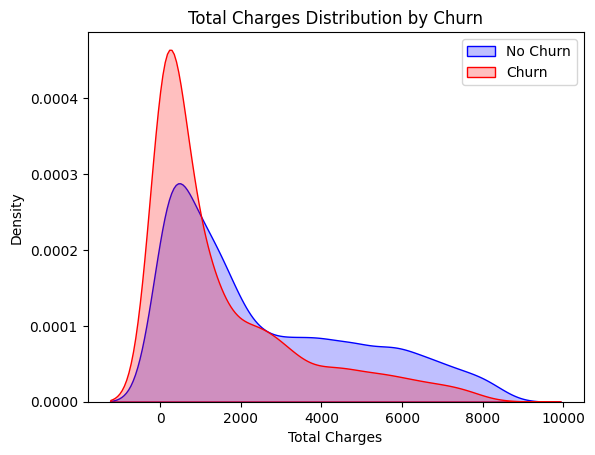

In [60]:
tot = sns.kdeplot(new_df.TotalCharges[(new_df['Churn']==0)], color="Blue", shade =True)
tot = sns.kdeplot(new_df.TotalCharges[(new_df['Churn']==1)], color="Red", shade =True)
tot.set_xlabel("Total Charges")
tot.set_ylabel("Density")
tot.set_title("Total Charges Distribution by Churn")
tot.legend(["No Churn","Churn"], loc='upper right')

Although churn tends to increase with higher monthly charges, it decreases as total charges grow. This can be explained by the fact that customers with higher total charges typically have longer tenure, and these long-tenured customers are generally more loyal.


Text(0.5, 1.0, 'Correlation of Features with Churn')

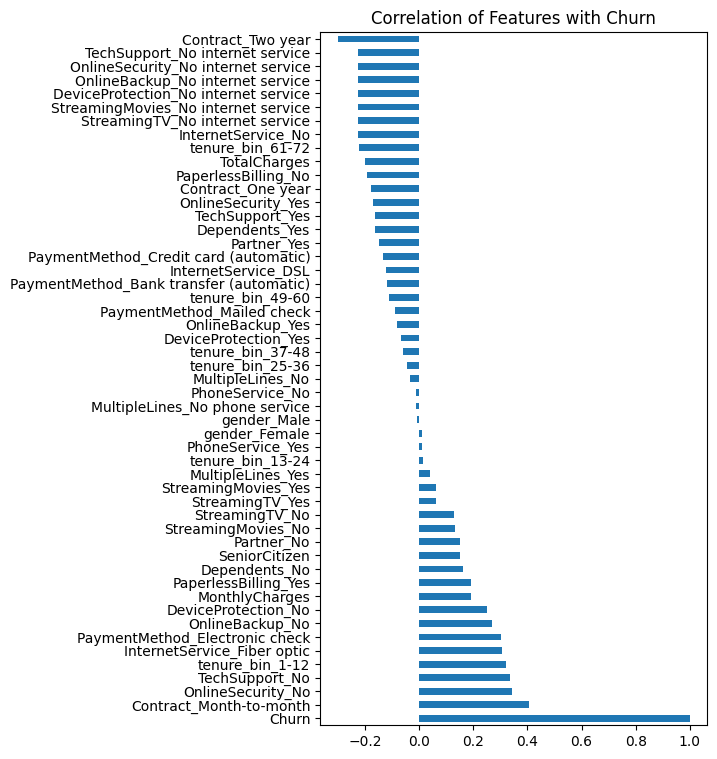

In [61]:
plt.figure(figsize=(5,9))
new_df.corr()['Churn'].sort_values(ascending=False).plot(kind='barh')
plt.title('Correlation of Features with Churn')

- High Churn is seen in Month to Month contract Customers, No Online security, No Tech support, 1-12 month service tenure, Fiber optic service users
- Low churn is seen in Two year Contracy customers, No internet service sunscriptions, and customer engaged for 5+ years
- Factors like Gender, availability of Phone service and no. of multiple lines have almost no impact on Churn

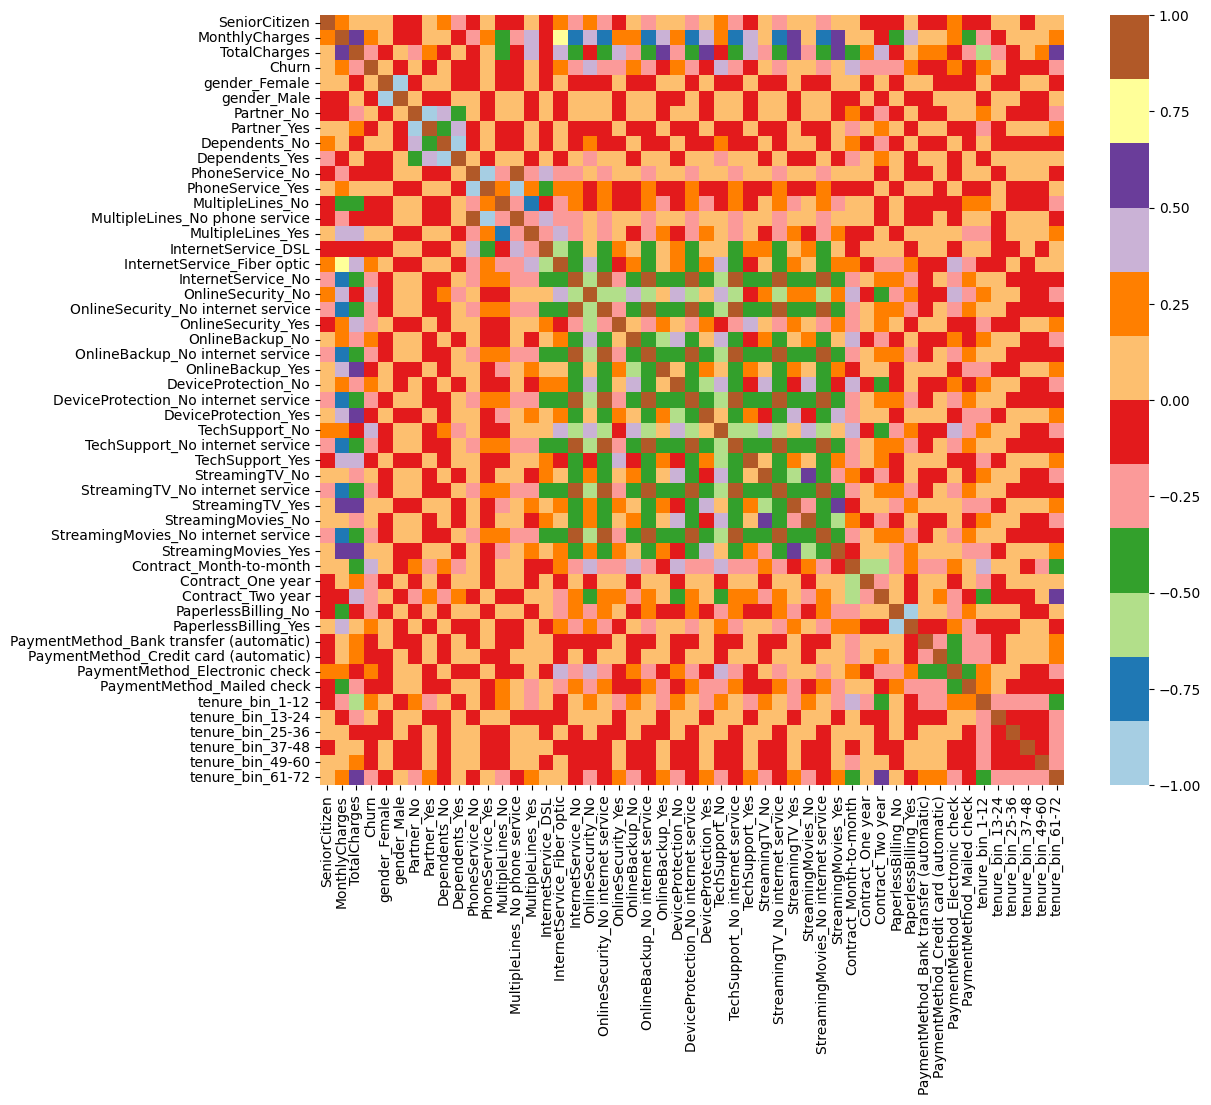

In [62]:
cor = new_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap="Paired")
plt.show()

In [63]:
new_df_0 = df1.loc[df1['Churn']==0]
new_df_1 = df1.loc[df1['Churn']==1]

In [64]:
print(len(new_df_0))
print(len(new_df_1))

5163
1869


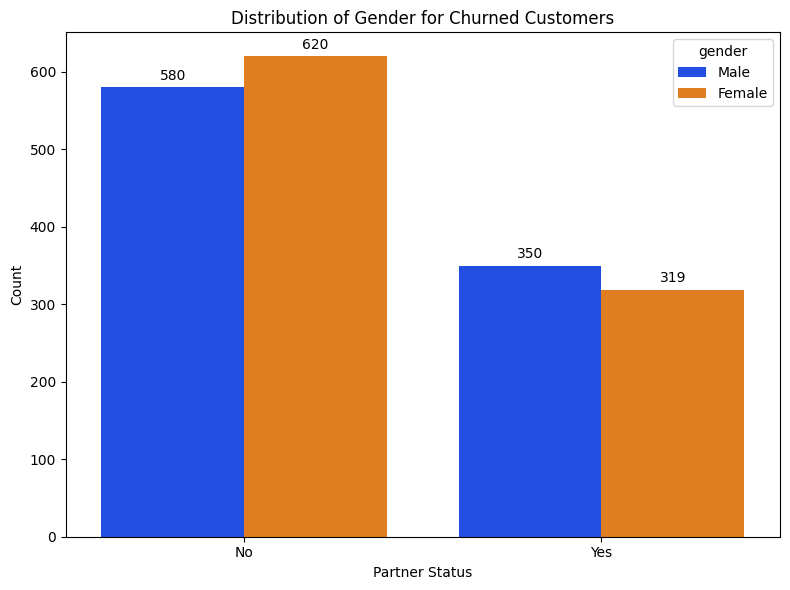

In [65]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=new_df_1, x='Partner', hue='gender', palette='bright')

# Axis labels and title (optional)
ax.set_xlabel('Partner Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender for Churned Customers')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
    # If numbers are large and you want separators:
    # ax.bar_label(container, labels=[f'{int(bar.get_height()):,}' for bar in container], padding=3)

plt.tight_layout()
plt.show()

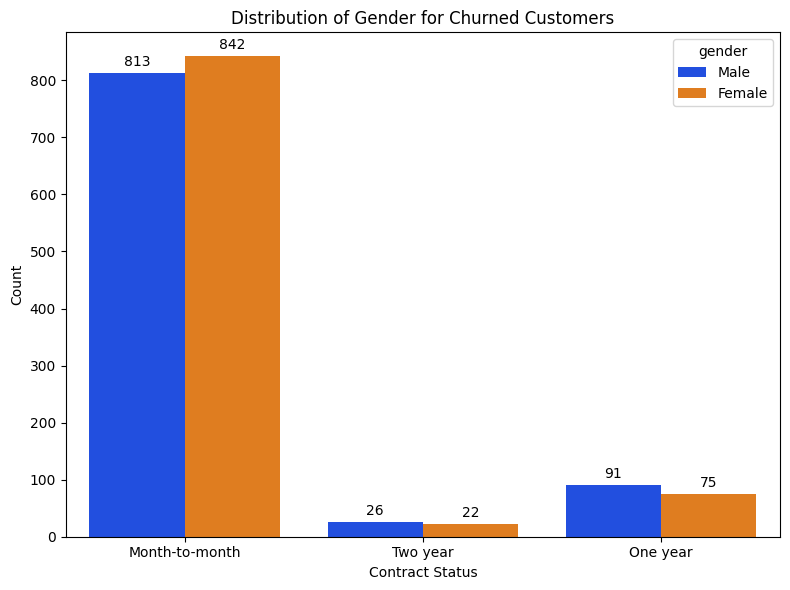

In [66]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=new_df_1, x='Contract', hue='gender', palette='bright')

# Axis labels and title (optional)
ax.set_xlabel('Contract Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender for Churned Customers')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
    # If numbers are large and you want separators:
    # ax.bar_label(container, labels=[f'{int(bar.get_height()):,}' for bar in container], padding=3)

plt.tight_layout()
plt.show()

### Hypothesis Testing

In [70]:
# Two‑Proportion Z‑Test - Senior Citizens vs Non‑Seniors (Churn rate) [Why: Quantifies if seniors truly churn more than others (42% observation).]
# Null Hypothesis (H0): There is no difference in churn rates between senior citizens and non-senior citizens. (P senior = P non-senior)
# Alternative Hypothesis (H1): There is a significant difference in churn rates between senior citizens and non-senior citizens. (P senior != P non-senior)


python -m pip install statsmodels



SyntaxError: invalid syntax (477097162.py, line 6)